# This is assignment11

## Name : Jaehyun Lim
    
## Student ID : 20145450

## Obtaining u to minimize by lamda

$$\parallel f - u  \parallel_{2}^{2} + \lambda(\parallel\frac{\text{d}u}{\text{d}x} \parallel^{2} +  \parallel\frac{\text{d}u}{\text{d}y} \parallel^{2} ) $$

## import packages 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from skimage import io, color
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray

## Denoise function

In [15]:

def denoise(img, lamda=0.1, eps=1e-3, num_iter_max=200):  
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
        
        # x and y components of u's gradient
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        
        # update the dual variable
        px_new = px + (tau / lamda) * ux
        py_new = py + (tau / lamda) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new

        # calculate divergence
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # update image
        u = img + lamda * div_p
        
        # calculate error
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        
        if i == 0:
            err_init = error
            err_prev = error
        else:
            # break if error small enough
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # don't forget to update iterator
        i += 1

    return u



## Load image and Convert to grayscale 

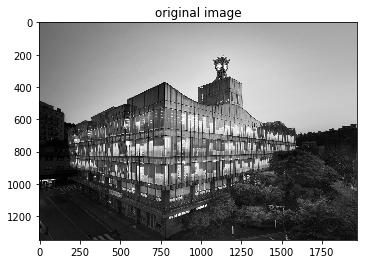

In [16]:
def rgb2gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img

        for i in range(3):
           grayImage[:,:,i] = Avg

        return grayImage   

file_image	= 'cau.jpg'
im_color 	= io.imread(file_image)
img2  	= rgb2gray(im_color)
plt.title('original image')
plt.imshow(img2.astype(np.uint8))


In [17]:
## noisy image

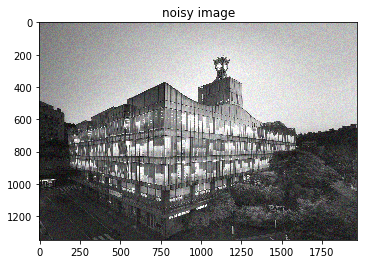

In [18]:
noisy = img2 + 0.5 * img2.std() * np.random.random(img2.shape)
noisy = np.clip(noisy, 0, 255)

plt.title('noisy image')
plt.imshow(noisy.astype(np.uint8))


## reconstruction image with varying regularization parameter 

$$\lambda = 2^{-3}, 2^{-1}, 2^{0}, 2^{3}, 2^{7} $$

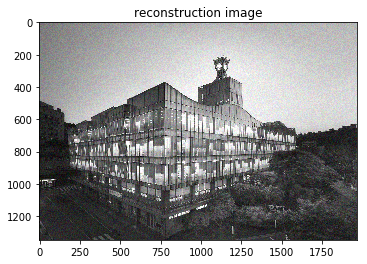

In [19]:
plt.title('reconstruction image')
plt.imshow(denoise(noisy, lamda=1/8).astype(np.uint8), cmap='viridis')

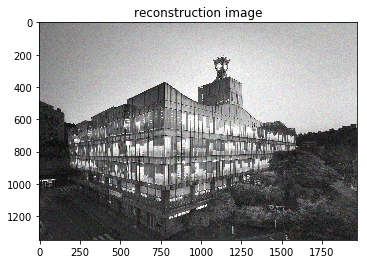

In [20]:
plt.title('reconstruction image')
plt.imshow(denoise(noisy, lamda=1/2).astype(np.uint8), cmap='viridis')

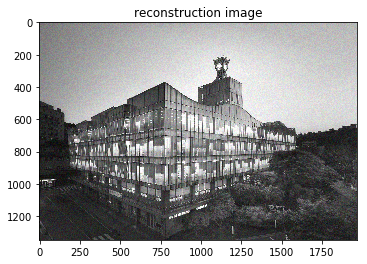

In [21]:
plt.title('reconstruction image')
plt.imshow(denoise(noisy, lamda=1).astype(np.uint8), cmap='viridis')

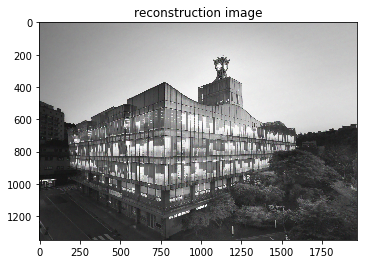

In [22]:
plt.title('reconstruction image')
plt.imshow(denoise(noisy, lamda=8).astype(np.uint8), cmap='viridis')

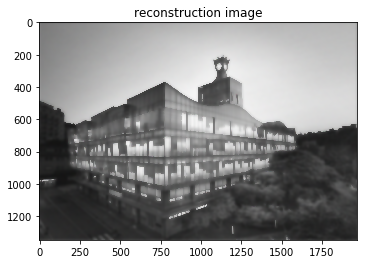

In [23]:
plt.title('reconstruction image')
plt.imshow(denoise(noisy, lamda=128).astype(np.uint8), cmap='viridis')

## The link to the github 

https://github.com/JaeHyunLim/assignment.git